In [19]:
# Step 1: Import libraries
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 2: Load the features and target
X = pd.read_csv('X_with_cluster_distances.csv')
Y = pd.read_csv('Y.csv')

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# Targets
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Confirm the shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (8171, 13)
Testing features shape: (2043, 13)
Training labels shape: (8171, 1)
Testing labels shape: (2043, 1)


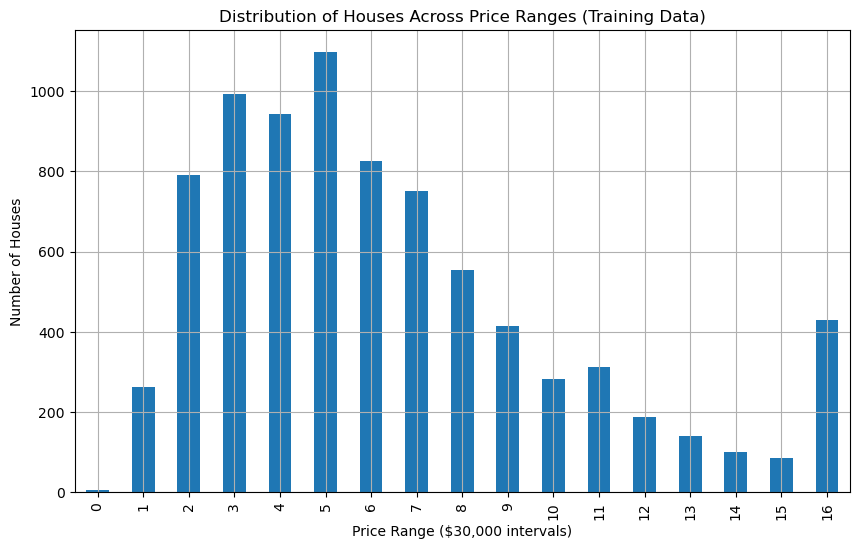

In [13]:
import matplotlib.pyplot as plt

# Merge X_train and y_train for easy plotting
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# Plot the distribution of price ranges
plt.figure(figsize=(10,6))
train_data['price_range'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Price Range ($30,000 intervals)')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses Across Price Ranges (Training Data)')
plt.grid(True)
plt.show()


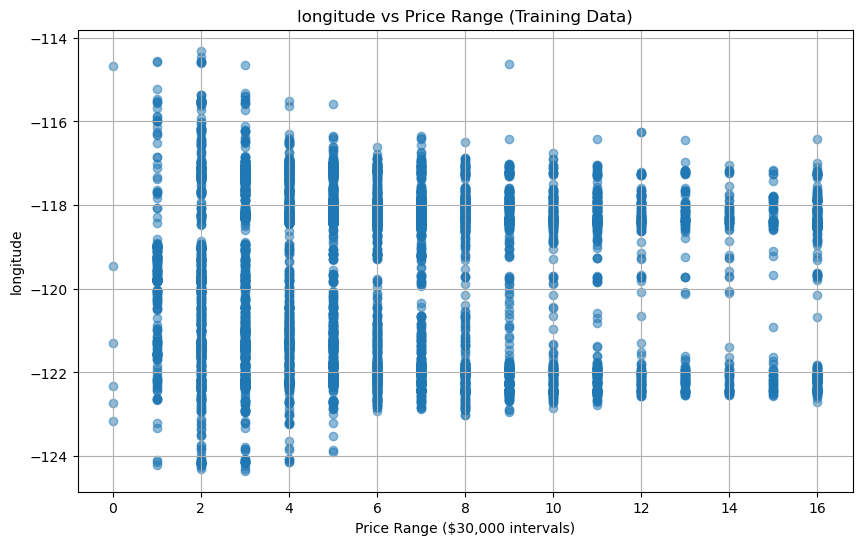

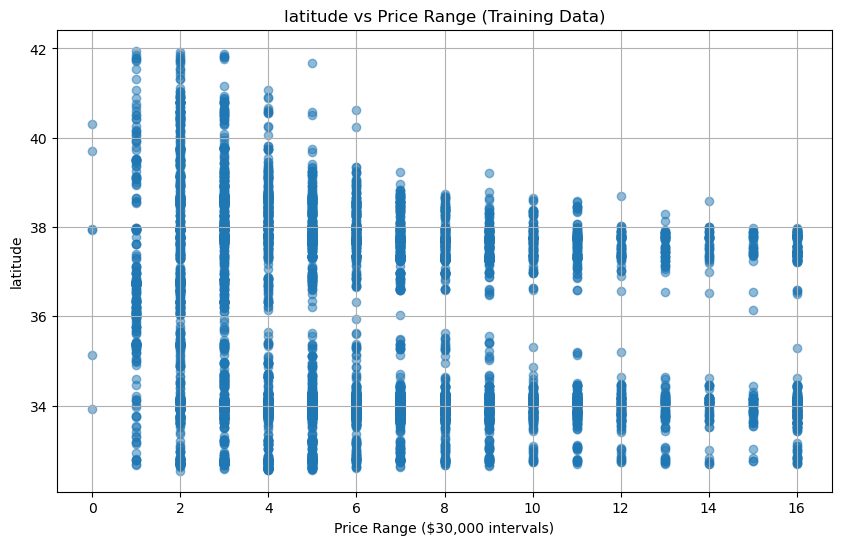

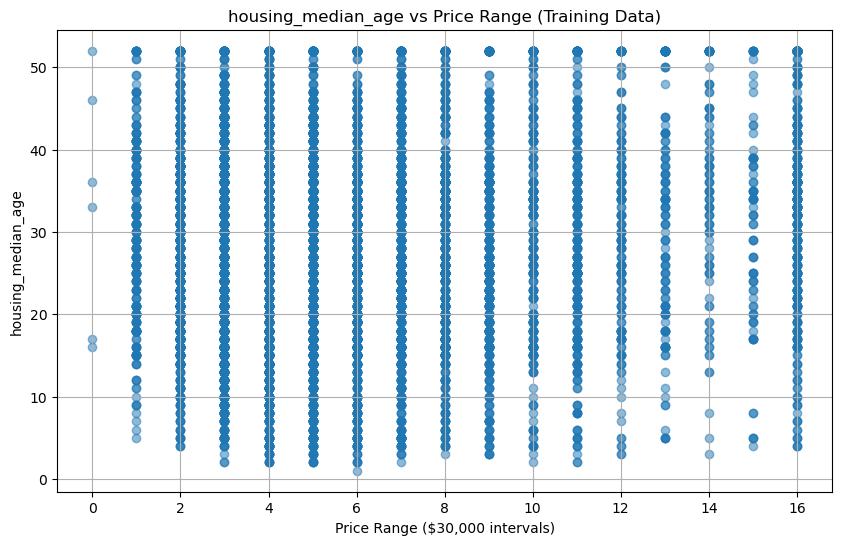

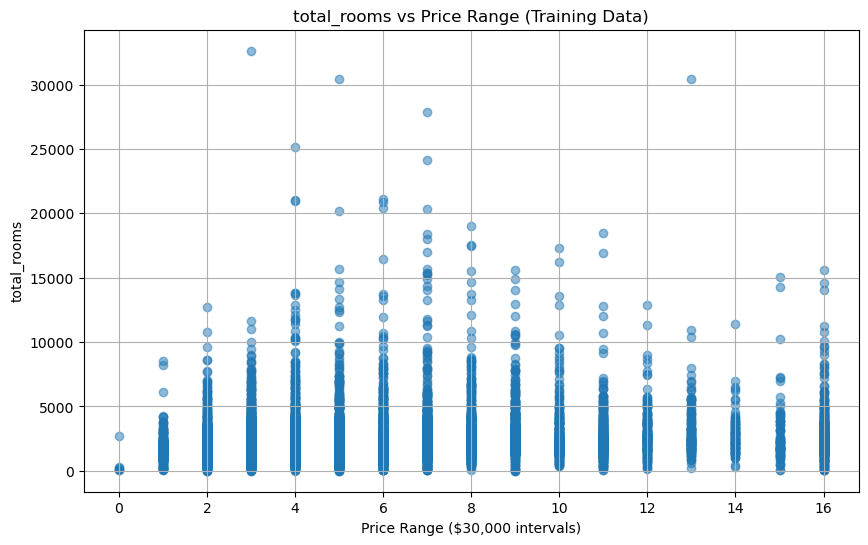

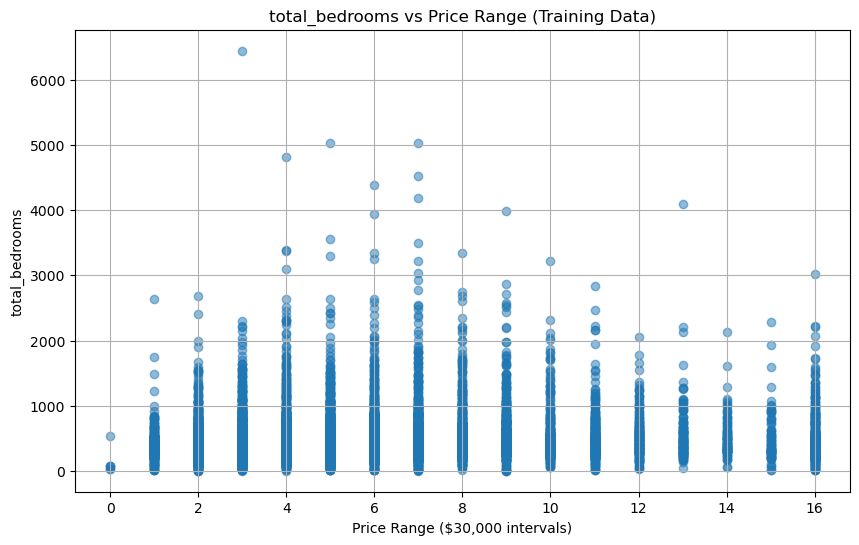

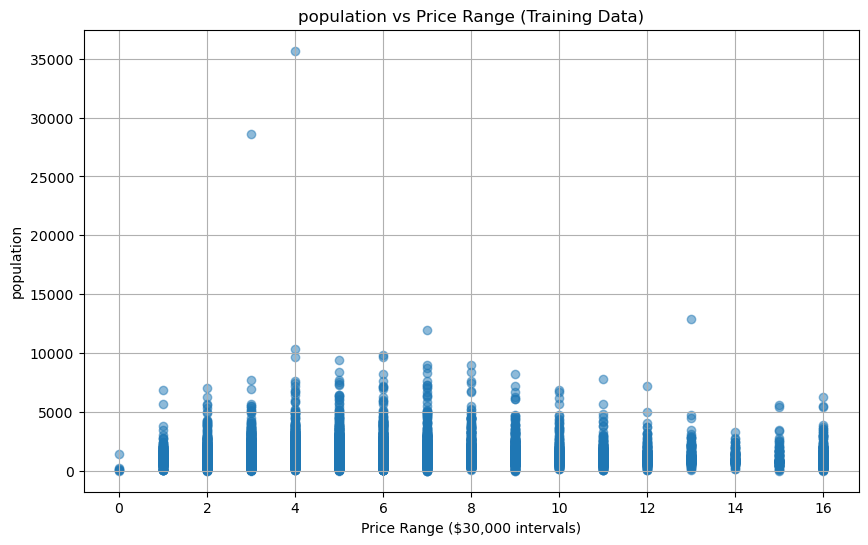

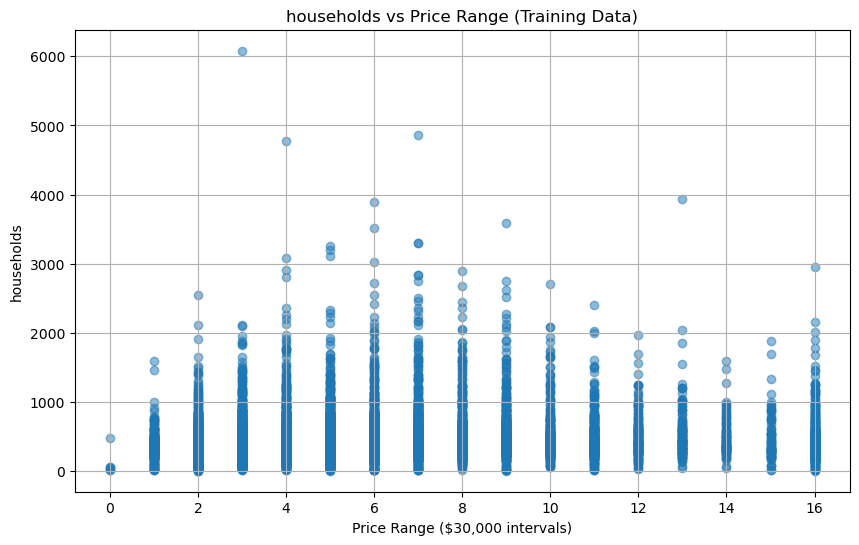

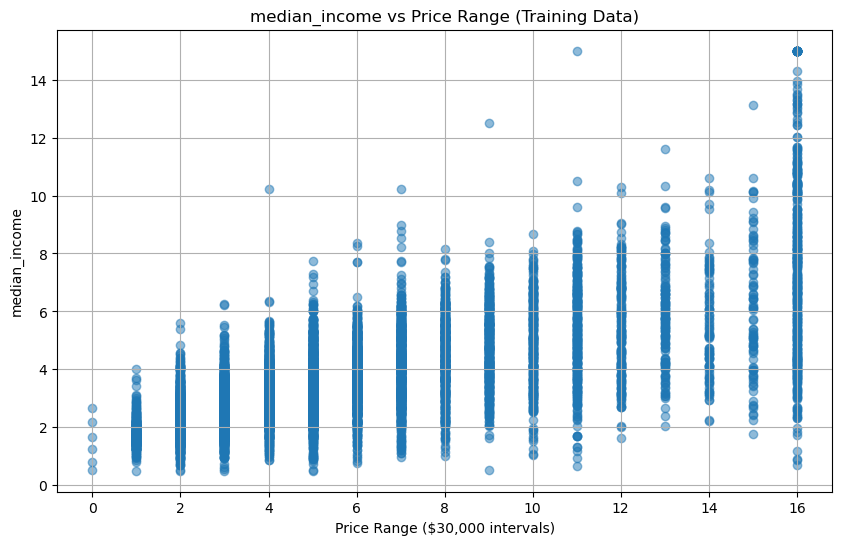

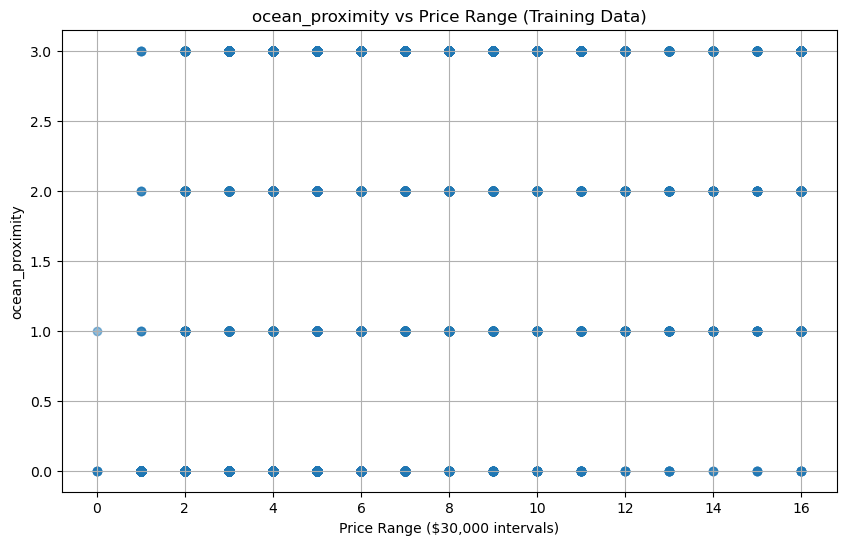

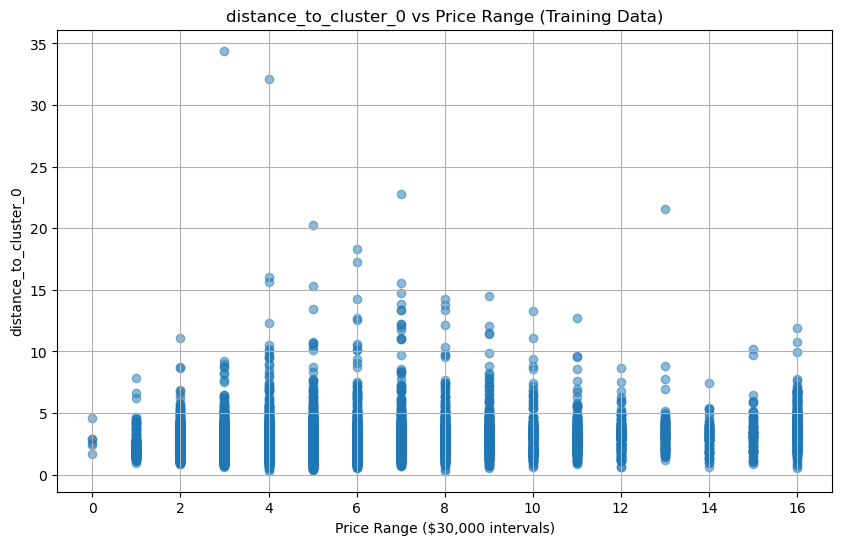

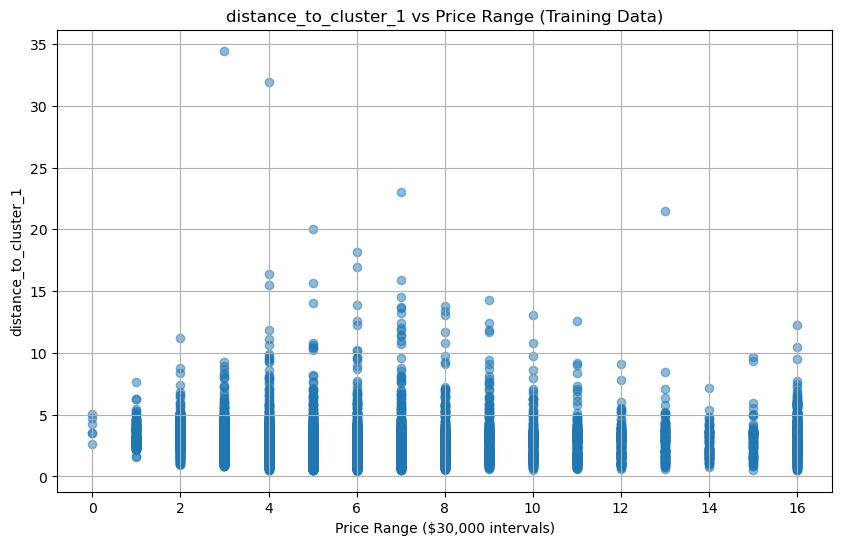

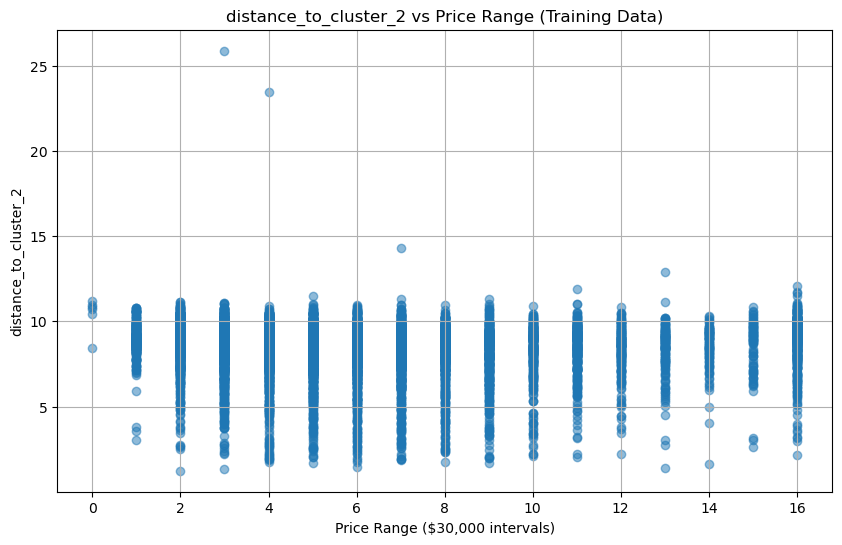

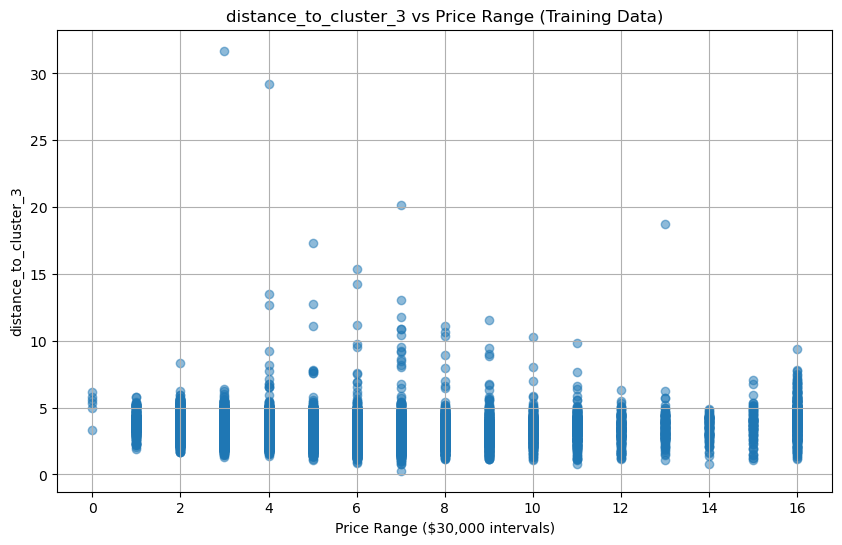

In [5]:
# List of features
feature_columns = X_train.columns

# Plot each feature vs price_range
for feature in feature_columns:
    plt.figure(figsize=(10,6))
    plt.scatter(train_data['price_range'], train_data[feature], alpha=0.5)
    plt.xlabel('Price Range ($30,000 intervals)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Price Range (Training Data)')
    plt.grid(True)
    plt.show()

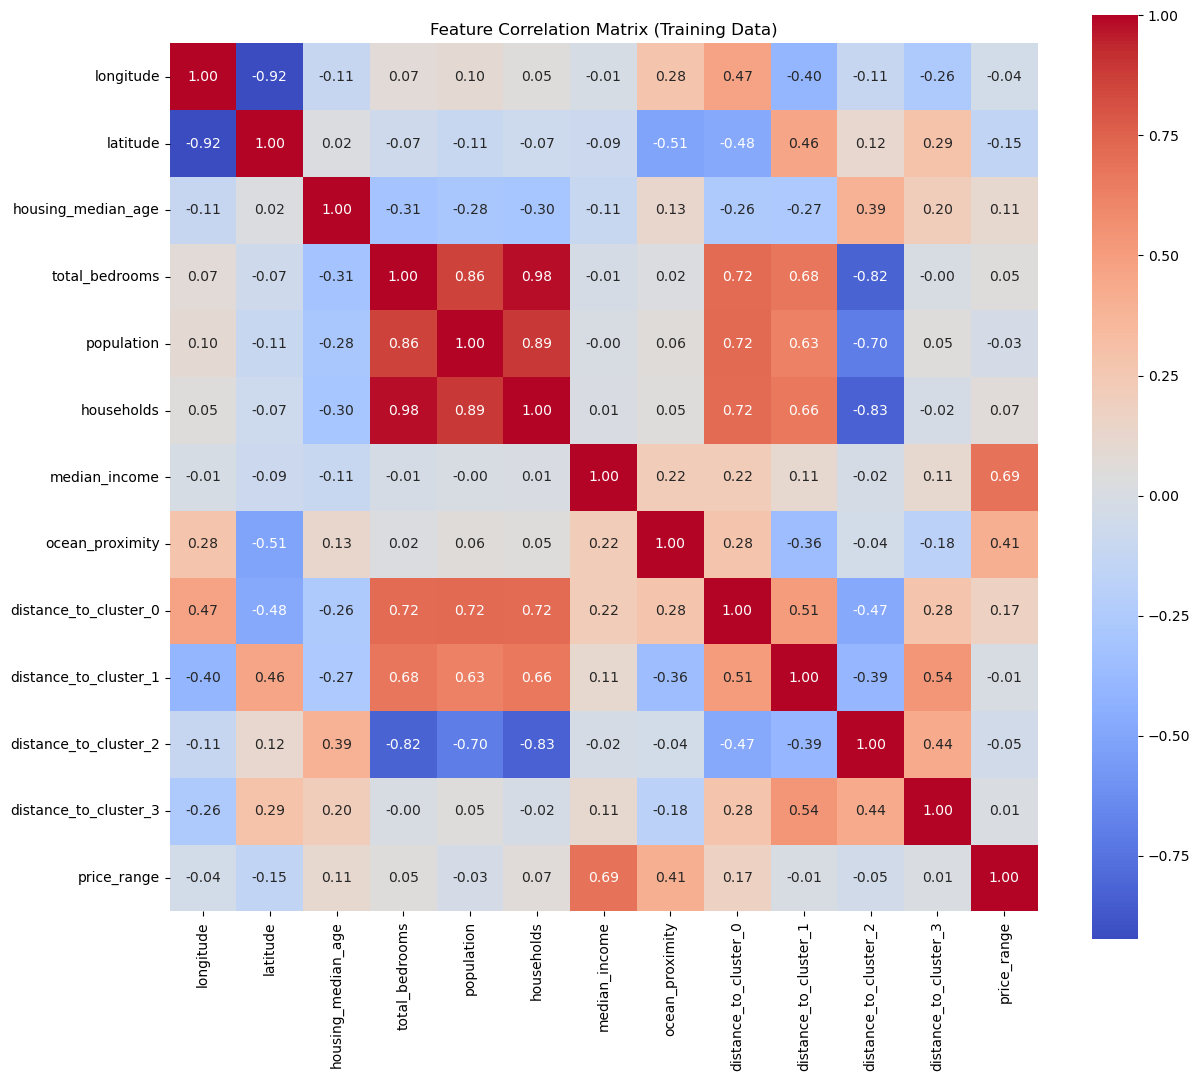

In [11]:
import seaborn as sns

# Combine X_train and y_train to compute correlations
train_corr = train_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(14,12))
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix (Training Data)')
plt.show()

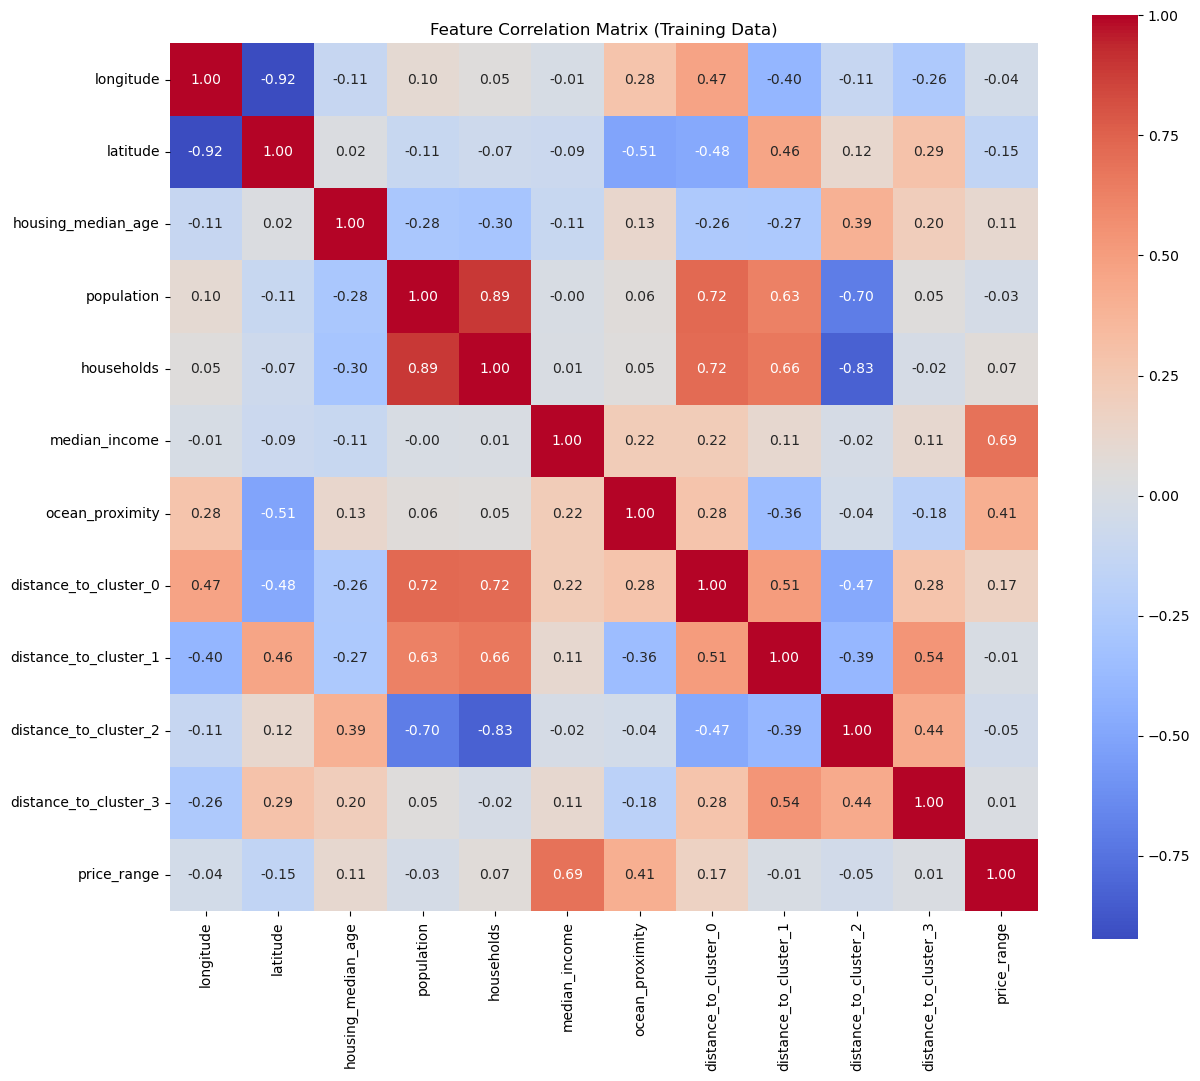

In [14]:
train_data = train_data.drop(columns=['total_rooms'])
train_data = train_data.drop(columns=['total_bedrooms'])
train_corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix (Training Data)')
plt.show()

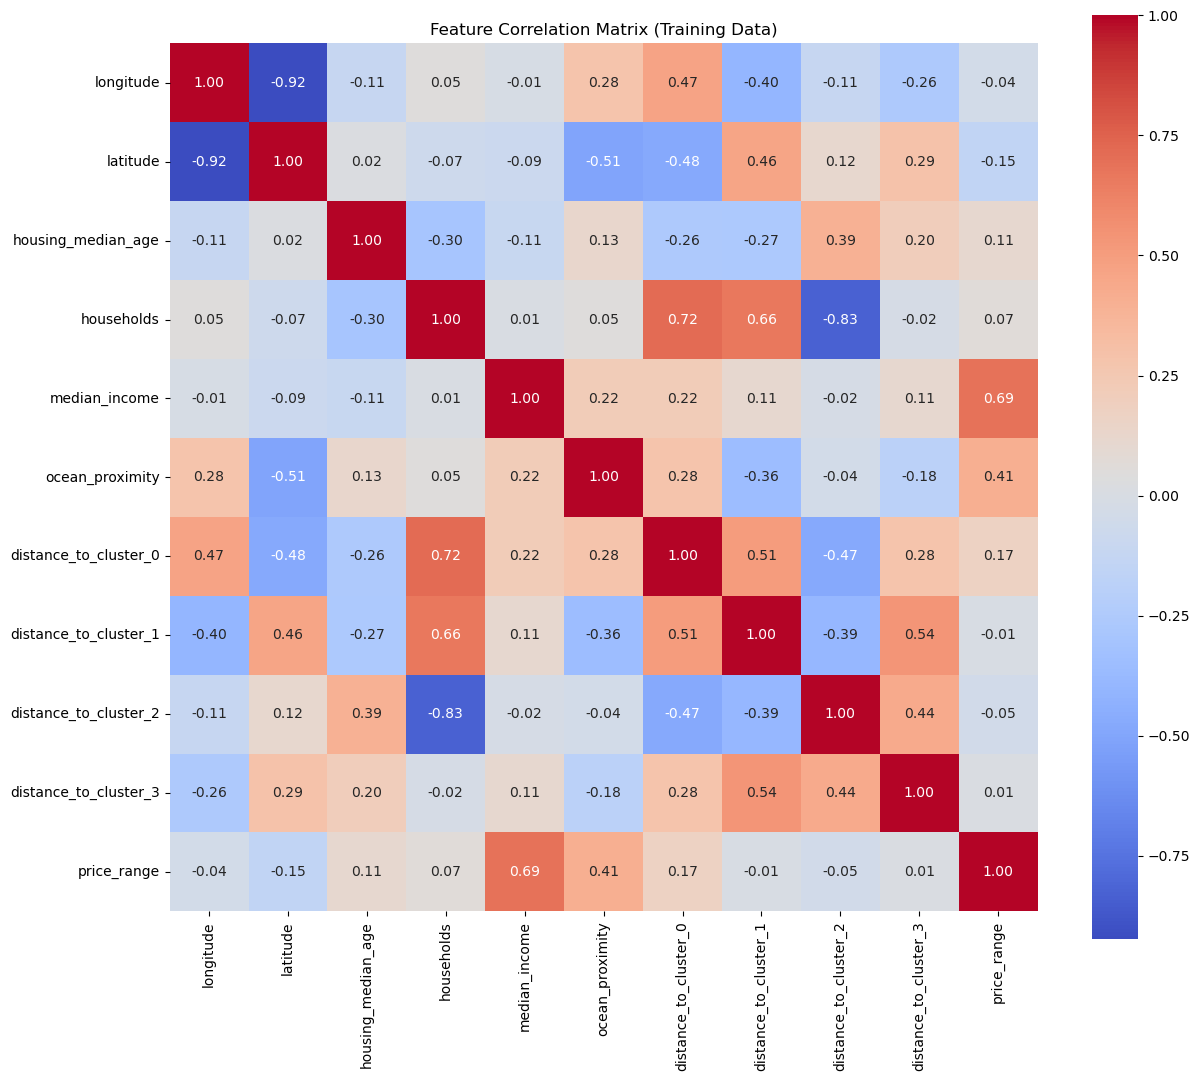

In [15]:
train_data = train_data.drop(columns=['population'])
train_corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix (Training Data)')
plt.show()